In [1]:
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import cv2
from datetime import datetime
import matplotlib.animation as animation
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
from astropy import units as u
from astropy.io import fits
from sunpy.net import Fido, attrs as a
import sunpy.visualization.colormaps as cm 
from astropy import uncertainty as unc
from astropy.visualization import quantity_support
from astropy.visualization import simple_norm, ContrastBiasStretch,ManualInterval,LinearStretch,MinMaxInterval,ImageNormalize, SqrtStretch,LogStretch,PowerDistStretch,PowerStretch,SinhStretch,SquaredStretch,AsinhStretch,PercentileInterval
%matplotlib widget

sdoaia131 = matplotlib.colormaps['sdoaia131']


In [2]:
with h5py.File('lines_file_20240808','r') as file:
    s1xp = file['s1x'][:]
    s1yp = file['s1y'][:]
    s2xp = file['s2x'][:]
    s2yp = file['s2y'][:]
    s3xp = file['s3x'][:]
    s3yp = file['s3y'][:]
    s4xp = file['s4x'][:]
    s4yp = file['s4y'][:]
    s5xp = file['s5x'][:]
    s5yp = file['s5y'][:]
    s6xp = file['s6x'][:]
    s6yp = file['s6y'][:]
    sheet_cube = file['sheet_cube'][:]
    x_lims = file['x_lims'][:]
    x_lims2 = file['x_lims2'][:]
    yticks = file['yticks'][:]

with h5py.File('mgn_ng_1024.hdf5','r') as cube_file:
    cube_data = cube_file['cube_display']
    cube = cube_data[550:675,0:550,145:270]
    cube2 = cube_data[:,:,145:270]

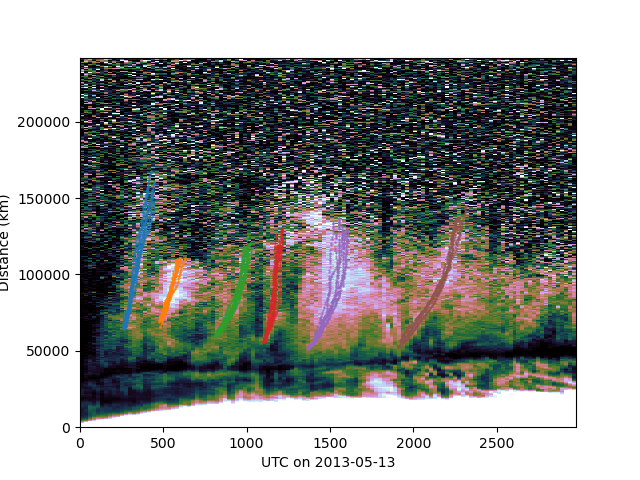

In [3]:
fig1, ax1 = plt.subplots()
plt.imshow(sheet_cube**2, vmin = 0, vmax = 0.4**2.15, cmap = 'cubehelix', extent=[x_lims2[0], x_lims2[-1], 0,yticks[-1]],interpolation='None')
ax1.plot(s1xp, s1yp, '.', ms=1.0)
ax1.plot(s2xp, s2yp, '.', ms=1.0)
ax1.plot(s3xp, s3yp, '.', ms=1.0)
ax1.plot(s4xp, s4yp, '.', ms=1.0)
ax1.plot(s5xp, s5yp, '.', ms=1.0)
ax1.plot(s6xp, s6yp, '.', ms=1.0)
#axs5.xaxis.set_major_formatter(date_format)
#fig5.autofmt_xdate()
ax1.set_aspect('auto')
ax1.set_xlabel('UTC on 2013-05-13')
ax1.set_ylabel('Distance (km)')
plt.show()

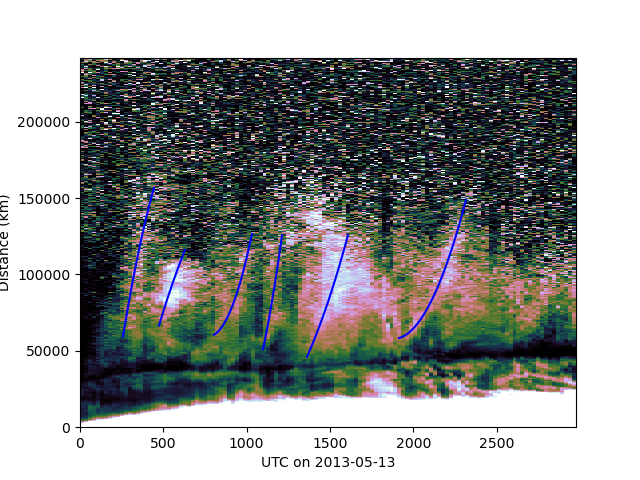

In [4]:
s1_x = np.arange(s1xp.min(),s1xp.max(),0.1)
s2_x = np.arange(s2xp.min(),s2xp.max(),0.1)
s3_x = np.arange(s3xp.min(),s3xp.max(),0.1)
s4_x = np.arange(s4xp.min(),s4xp.max(),0.1)
s5_x = np.arange(s5xp.min(),s5xp.max(),0.1)
s6_x = np.arange(s6xp.min(),s6xp.max(),0.1)

z1,c1 = np.polyfit(s1xp, s1yp , 2, cov=True)
f1 = np.poly1d(z1)
y1 = f1(s1_x)

z2,c2 = np.polyfit(s2xp, s2yp , 2, cov=True)
f2 = np.poly1d(z2)
y2 = f2(s2_x)

z3,c3 = np.polyfit(s3xp, s3yp , 2, cov=True)
f3 = np.poly1d(z3)
y3 = f3(s3_x)

z4,c4 = np.polyfit(s4xp, s4yp , 2, cov=True)
f4 = np.poly1d(z4)
y4 = f4(s4_x)

z5,c5 = np.polyfit(s5xp, s5yp , 2, cov=True)
f5 = np.poly1d(z5)
y5 = f5(s5_x)

z6,c6 = np.polyfit(s6xp, s6yp , 2, cov=True)
f6 = np.poly1d(z6)
y6 = f6(s6_x)

date_format = mdates.DateFormatter('%H:%M:%S')

fig2, ax2 = plt.subplots()
plt.imshow(sheet_cube**2, vmin = 0, vmax = 0.4**2.15, cmap = 'cubehelix', extent=[x_lims2[0], x_lims2[-1], 0,yticks[-1]],interpolation='None')
ax2.plot(s1_x, y1, 'b')
ax2.plot(s2_x, y2, 'b')
ax2.plot(s3_x, y3, 'b')
ax2.plot(s4_x, y4, 'b')
ax2.plot(s5_x, y5, 'b')
ax2.plot(s6_x, y6, 'b')

#ax2.xaxis_date()
#ax2.xaxis.set_major_formatter(date_format)
#fig2.autofmt_xdate()

ax2.set_aspect('auto')
ax2.set_xlabel('UTC on 2013-05-13')
ax2.set_ylabel('Distance (km)')
plt.show()

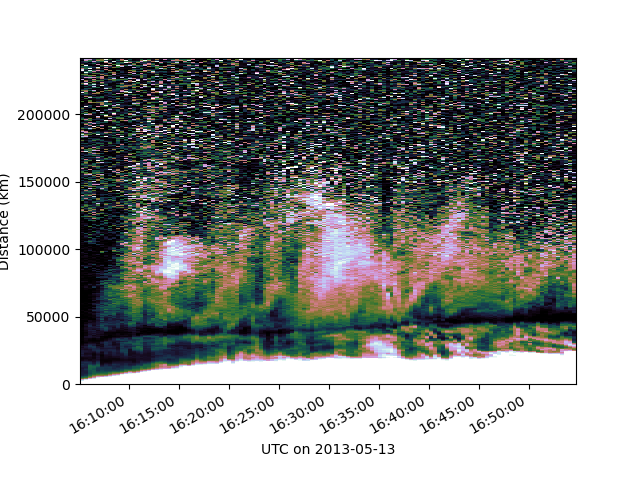

In [5]:
date_format = mdates.DateFormatter('%H:%M:%S')
fig3, ax3 = plt.subplots()
plt.imshow(sheet_cube**2, vmin = 0, vmax = 0.4**2.15, cmap = 'cubehelix', extent=[x_lims[0], x_lims[-1], 0,yticks[-1]],interpolation='None')

ax3.xaxis_date()
ax3.xaxis.set_major_formatter(date_format)
fig3.autofmt_xdate()

ax3.set_aspect('auto')
ax3.set_xlabel('UTC on 2013-05-13')
ax3.set_ylabel('Distance (km)')
plt.show()

2024-10-02 13:56:28 - matplotlib.animation - INFO: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2024-10-02 13:56:29 - matplotlib.animation - INFO: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 15 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -b 1800k -metadata artist=Me -y AIA_Animation.mp4


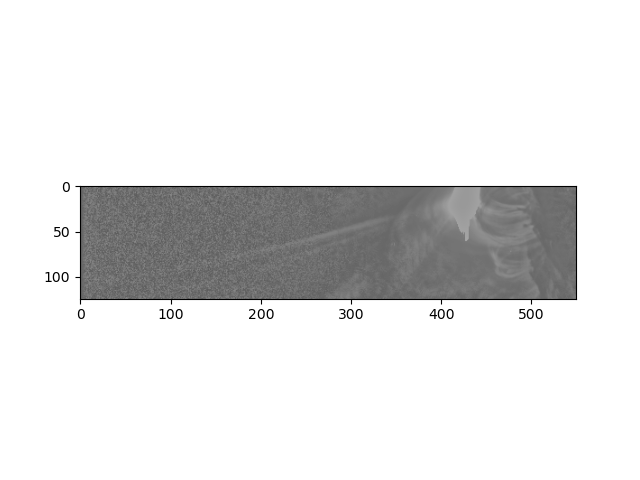

In [6]:
fig3,ax3 = plt.subplots()
movie = []
for i in range(cube.shape[2]):
    # For Sept. 10 event, use 600:900, 900:1280
    image = cube[:,:,i]
    norm = ImageNormalize(image,stretch=ContrastBiasStretch(0.3,0.5))
    im = plt.imshow(image,norm=norm, animated=True, cmap = 'gray')
    movie.append([im])
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani = animation.ArtistAnimation(fig3, movie, interval=100)    
ani.save('AIA_Animation.mp4', writer=writer)
plt.show()

f5

In [6]:
plt.close('all')

In [7]:
plt.close('all')
d_pix = 440192.8294063024
yticks_new = np.arange(0,125) * d_pix
yticks_new = yticks_new/1000000
xticks_new = np.arange(0,550) * d_pix
xticks_new = xticks_new/1000000

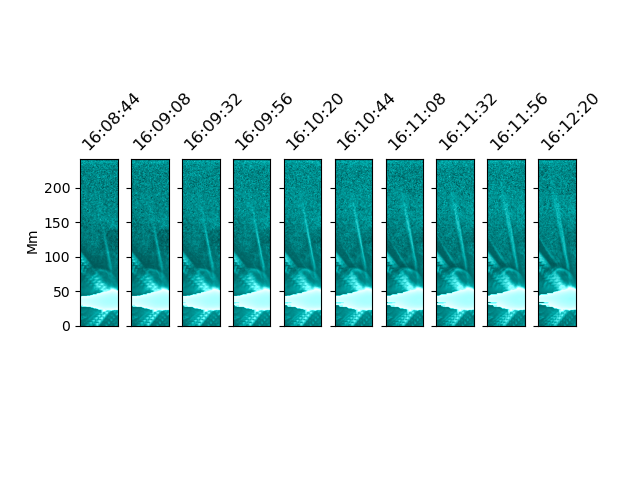

In [8]:
fig4,ax4 = plt.subplots(1,10, sharex=True, sharey=True)
#plt.tight_layout()
plt.subplots_adjust(wspace=0.35, hspace=0)
ax4[0].imshow(np.rot90(cube[:,:,9],3), extent=[yticks_new[0],yticks_new[-1],0, xticks_new[-1]], cmap=sdoaia131)
ax4[0].set_title(str(date_format(x_lims[9])), rotation = 45, loc='left')
ax4[1].imshow(np.rot90(cube[:,:,10],3), extent=[yticks_new[0],yticks_new[-1],0, xticks_new[-1]], cmap=sdoaia131)
ax4[1].set_title(str(date_format(x_lims[10])), rotation = 45, loc='left')
ax4[2].imshow(np.rot90(cube[:,:,11],3), extent=[yticks_new[0],yticks_new[-1],0, xticks_new[-1]], cmap=sdoaia131)
ax4[2].set_title(str(date_format(x_lims[11])), rotation = 45, loc='left')
ax4[3].imshow(np.rot90(cube[:,:,12],3), extent=[yticks_new[0],yticks_new[-1],0, xticks_new[-1]], cmap=sdoaia131)
ax4[3].set_title(str(date_format(x_lims[12])), rotation = 45, loc='left')
ax4[4].imshow(np.rot90(cube[:,:,13],3), extent=[yticks_new[0],yticks_new[-1],0, xticks_new[-1]], cmap=sdoaia131)
ax4[4].set_title(str(date_format(x_lims[13])), rotation = 45, loc='left')
ax4[5].imshow(np.rot90(cube[:,:,14],3), extent=[yticks_new[0],yticks_new[-1],0, xticks_new[-1]], cmap=sdoaia131)
ax4[5].set_title(str(date_format(x_lims[14])), rotation = 45, loc='left')
ax4[6].imshow(np.rot90(cube[:,:,15],3), extent=[yticks_new[0],yticks_new[-1],0, xticks_new[-1]], cmap=sdoaia131)
ax4[6].set_title(str(date_format(x_lims[15])), rotation = 45, loc='left')
ax4[7].imshow(np.rot90(cube[:,:,16],3), extent=[yticks_new[0],yticks_new[-1],0, xticks_new[-1]], cmap=sdoaia131)
ax4[7].set_title(str(date_format(x_lims[16])), rotation = 45, loc='left')
ax4[8].imshow(np.rot90(cube[:,:,17],3), extent=[yticks_new[0],yticks_new[-1],0, xticks_new[-1]], cmap=sdoaia131)
ax4[8].set_title(str(date_format(x_lims[17])), rotation = 45, loc='left')
ax4[9].imshow(np.rot90(cube[:,:,18],3), extent=[yticks_new[0],yticks_new[-1],0, xticks_new[-1]], cmap=sdoaia131)
ax4[9].set_title(str(date_format(x_lims[18])), rotation = 45, loc='left')
plt.xticks([])
fig4.text(0.04, 0.5, 'Mm', va='center', rotation='vertical')
plt.show()

In [9]:
print(max(yticks_new))

54.5839108463815


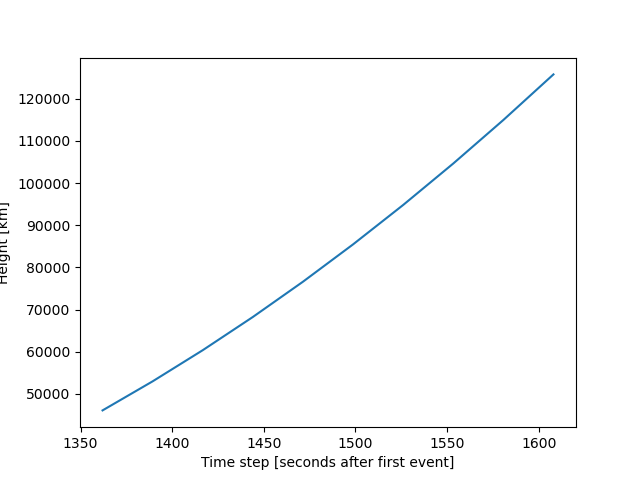

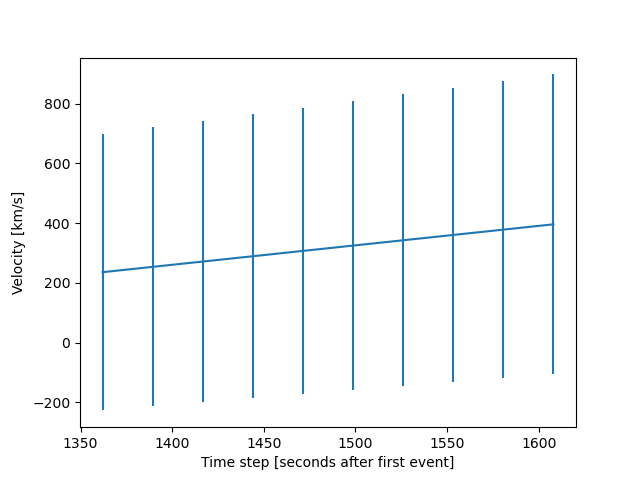

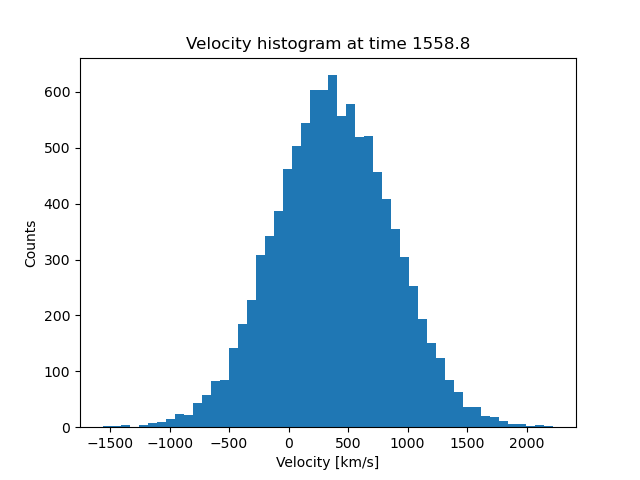

In [10]:

x_start, x_end = round(min(s5_x)), round(max(s5_x))
f_coeffs = np.array([f5[2], f5[1], f5[0]])
f_covariance = c5


if __name__ == "__main__":
    n_points, n_samples = 10, 10_000  # number of points in velocity plot and sample count in uncertainty propagation
    f_stds = [np.sqrt(f_covariance[i, i]) for i in range(3)]
    f = lambda x: f_coeffs[0] * x**2 + f_coeffs[1] * x + f_coeffs[2]
    f_prime = lambda x: unc.normal(2*f_coeffs[0], std=2*f_stds[0], n_samples=n_samples) * x + unc.normal(f_coeffs[1], std=f_stds[1], n_samples=n_samples)

    x_range = np.linspace(x_start, x_end, n_points)
    velocities = f_prime(x_range)

    fig, ax = plt.subplots()
    ax.plot(x_range, f(x_range))
    ax.set_xlabel("Time step [seconds after first event]")
    ax.set_ylabel("Height [km]")
    #fig.savefig("curve.png")
    plt.show()

    fig, ax = plt.subplots()
    ax.errorbar(x_range, [v.pdf_mean() for v in velocities], xerr=0, yerr=[v.pdf_std() for v in velocities])
    ax.set_xlabel("Time step [seconds after first event]")
    ax.set_ylabel("Velocity [km/s]")
    #fig.savefig("velocity_with_uncertainty.png")
    plt.show()


    with quantity_support():
        i = 8  # change this for a different time
        x = x_start + i * (x_end - x_start) / n_points
        fig, ax = plt.subplots()
        ax.hist(velocities[i].distribution, bins=50)
        ax.set_title(f"Velocity histogram at time {x}")
        ax.set_ylabel("Counts")
        ax.set_xlabel("Velocity [km/s]")
        #fig.savefig("velocity_distribution.png")
        plt.show()

In [11]:
plt.close('all')

In [12]:
hdu_list = fits.open('aia_lev1_131a_2013_05_13t16_33_56_62z_image_lev1.fits')

In [13]:
full_image = hdu_list[1].data

In [20]:
#a.Time('2013-05-13 16:00:00','2013-05-13 17:00:00')

In [21]:
#aia_results = Fido.search(a.Time('2013-05-13 16:00:00', '2013-05-13 17:00:00'), a.Instrument.aia, a.Wavelength(131*u.angstrom))

In [16]:
#downloaded_files = Fido.fetch(aia_results)

Files Downloaded:   0%|          | 0/300 [00:00<?, ?file/s]

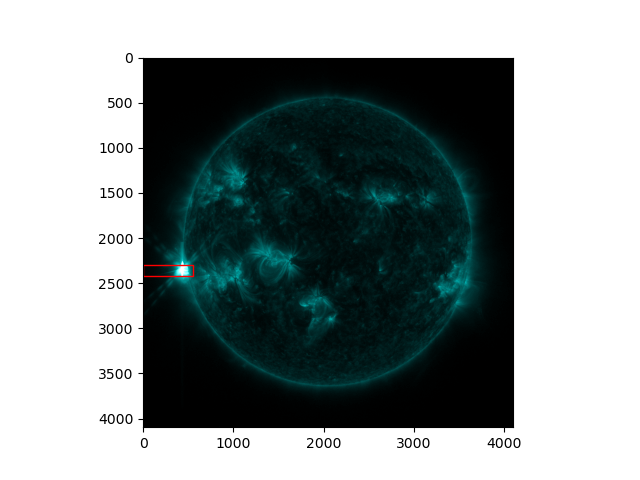

In [14]:


fig,ax = plt.subplots()
norm = simple_norm(full_image, 'log', vmin=0.7)
rect = patches.Rectangle((0, 2300), 550, 125, linewidth=1, edgecolor='r', facecolor='none')
ax.imshow(full_image, norm=norm, cmap=sdoaia131)
ax.add_patch(rect)
plt.show()